<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/multiRingBuffer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-6-db34670c4ef4>:19: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  buffer_gdf.geometry = buffer_gdf.geometry.buffer(dist)
<ipython-input-6-db34670c4ef4>:42: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


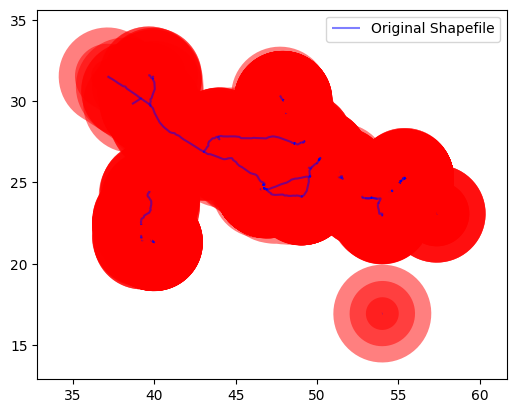

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

def create_multi_ring_buffer(gdf, distances):
    """
    Creates a multi-ring buffer around the geometries in a GeoDataFrame.

    Parameters:
        gdf (geopandas.GeoDataFrame): The GeoDataFrame containing the geometries.
        distances (list): A list of distances for each ring in the buffer.

    Returns:
        A geopandas GeoDataFrame representing the multi-ring buffer.
    """
    buffers = []
    for dist in distances:
        buffer_gdf = gdf.copy()
        buffer_gdf.geometry = buffer_gdf.geometry.buffer(dist)
        buffers.append(buffer_gdf)
    multi_ring_buffer = gpd.GeoDataFrame(pd.concat(buffers, ignore_index=True))
    return multi_ring_buffer

if __name__ == "__main__":
    # Replace 'path/to/your/shapefile.shp' with the path to your shapefile
    shapefile_path = '/gis_osm_railways_free_1.shp'

    # Read the shapefile using geopandas
    gdf = gpd.read_file(shapefile_path)

    # Define distances for each ring in the buffer (in units of your shapefile)
    buffer_distances = [1, 2,3]  # Example distances: 100 units, 200 units, and 300 units

    # Create the multi-ring buffer
    multi_ring_buffer = create_multi_ring_buffer(gdf, buffer_distances)

    # Plot the results using matplotlib
    fig, ax = plt.subplots()
    gdf.plot(ax=ax, color='blue', alpha=0.5, label='Original Shapefile')
    multi_ring_buffer.plot(ax=ax, color='red', alpha=0.5, label='Multi-Ring Buffer')
    ax.set_aspect('equal')
    plt.legend()
    plt.show()
